# Harley Wood School for Astronomy 2019 

<img src="https://research.smp.uq.edu.au/asa2019/static/asa19/img/HWSA2019-logo.png" width=300>

## Part I - Good Code Etiquette or how to make your code more effective and efficient

In this part of the workshop we will look at an example code to reproduce HR diagrams using Gaia data.

<img src="https://www.cosmos.esa.int/documents/29201/1666086/kine_all.png/8b9de0b4-8eb1-ad73-0922-9bf323687f6e?t=1524224828914" width=400>

The above Gaia Hertzsprung-Russell diagrams, Gaia absolute magnitude versus GBP-GRP colour, are a function of the stars tangential velocity (VT), using Gaia DR2 with relative parallax uncertainty better than 10% and low extinction stars (E(B-V)<0.015), together with astrometric and photometric quality filters. The colour scale represents the square root of the density


## Table of Contents

1. [Downloading the data](#Downloading-the-data)
2. [Cleaning the data](#Cleaning-the-data)
3. [Plotting the HR diagram](#Plotting-the-HR-diagram)


### Required libraries

This notebook uses several Python packages that come standard with the [Anaconda Python distribution](http://continuum.io/downloads). The primary libraries that we'll be using are:

* **astropy**
* **astroquery**
* **numpy**
* **pandas**
* **matplotlib**
* **seaborn**

To make sure you have all of the packages you need, install them with `conda`:

    conda install [package name]
    conda install -c astropy astroquery
    
`conda` may ask you to update some of the packages if you don't have the most recent version. Allow it to do so.

Alternatively, if you can install the packages with [pip](https://pip.pypa.io/en/stable/installing/) (a Python package manager):

    pip install [package name]
    
Be sure to restart your kernel if you had to install new packages.

# Downloading the data

We can download data from Gaia using the astroquery library, specifically we are using the Table Access Protocol (TAP) specified by the International Virtual Observatory Alliance.

[TAP astroquery docs](https://astroquery.readthedocs.io/en/latest/utils/tap.html)

[Gaia Tap examples](https://gaia.aip.de/cms/documentation/tap-interface/)

In [1]:
#List available tables
from astroquery.utils.tap.core import TapPlus

gaia = TapPlus(url="https://gaia.aip.de/tap")
tables = gaia.load_tables()
for table in (tables):
    print(table.get_qualified_name())

Created TAP+ (v1.0.1) - Connection:
	Host: gaia.aip.de
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Retrieving tables...
Parsing tables...
Done.
gdr2.gaia_source
gdr2.sso_observation
gdr2.sso_source
gdr2.vari_cepheid
gdr2.vari_classifier_class_definition
gdr2.vari_classifier_definition
gdr2.vari_classifier_result
gdr2.vari_long_period_variable
gdr2.vari_rotation_modulation
gdr2.vari_rrlyrae
gdr2.vari_short_timescale
gdr2.vari_time_series_statistics
gdr2.epoch_photometry
gdr2.dr1_neighbourhood
gdr2.allwise_best_neighbour
gdr2.allwise_neighbourhood
gdr2.apassdr9_best_neighbour
gdr2.apassdr9_neighbourhood
gdr2.gsc23_best_neighbour
gdr2.gsc23_neighbourhood
gdr2.hipparcos2_best_neighbour
gdr2.hipparcos2_neighbourhood
gdr2.panstarrs1_best_neighbour
gdr2.panstarrs1_neighbourhood
gdr2.ppmxl_best_neighbour
gdr2.ppmxl_neighbourhood
gdr2.ravedr5_best_neighbour
gdr2.ravedr5_neighbourhood
gdr2.sdssdr9_best_neighbour
gdr2.sdssdr9_neighbourhood
gdr2.tmass_best_neighbour
gdr2.tmass_neighbourhood
gdr2.ty

In [ ]:
# Load DR2 source table and check columns
from astroquery.utils.tap.core import TapPlus

gaia = TapPlus(url="http://gea.esac.esa.int/tap-server/tap")
table = gaia.load_table('gaiadr2.gaia_source')
for column in (table.columns):
    print(column.name)

**WARNING** This query takes a long time. Please load the data from the file given to you by the instructors

In [67]:
# Download gaia dr 2 source table, save to disk
gaia = TapPlus(url="http://gea.esac.esa.int/tap-server/tap")
job = gaia.launch_job_async("select * from gaiadr2.gaia_source order by source_id", dump_to_file=True)
print(job)

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Jobid: 1561899715024O
Phase: COMPLETED
Owner: None
Output file: async_20190630210155.vot
Results: None


In [68]:
# return result of query 
r = job.get_results()

In [ ]:
#save the data
from astropy.io import ascii

ascii.write(r, 'gaiadr2query.dat')


# Cleaning the data

The aim of this section is to make sure we have useful data, ie:
- remove NaN
- calculate the absolute magnitude
- subset into different location or velocity bins, we are interestedn in:

|Name        |Type        |UCD         |Unit        |Description |
|------------|------------|------------|------------|------------|
|bp_rp 	|float 	|phot.color 	|Magnitude[mag] 	|BP - RP colour|
|bp_g 	|float 	|phot.color 	|Magnitude[mag] 	|BP - G colour|
|g_rp 	|float 	|phot.color 	|Magnitude[mag] 	|G - RP colour|
|radial_velocity 	|double 	|spect.dopplerVeloc.opt 	|Velocity[km/s] 	|Radial velocity |

In [29]:
#convert to pandas df and calculate absolute mag
import pandas as pd
import numpy as np
from math import *

df = r.to_pandas()
df['mg'] = 0
df['dist'] = 0

for c, v in enumerate(df['phot_g_mean_mag']):
    
    p =df.loc[c,'parallax']
    if p>0:
        df.loc[c,'mg'] = v + 5 * log10(p) - 10
        df.loc[c,'dist'] = 1000/p
    else:
        df.loc[c,'mg'] = np.nan
        df.loc[c,'dist'] = np.nan

df.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,mg
0,1.635721e+18,b'Gaia DR2 4295806720',4.295807e+09,8.337194e+08,2015.5,44.996154,0.119382,0.005616,0.122872,0.071448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,1.923885
1,1.635721e+18,b'Gaia DR2 34361129088',3.436113e+10,1.253687e+09,2015.5,45.004316,0.132215,0.021045,0.150330,3.486774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,10.316146
2,1.635721e+18,b'Gaia DR2 38655544960',3.865554e+10,1.168974e+09,2015.5,45.004974,0.029723,0.019877,0.039862,3.121257,...,200111.0,0.586399,0.565991,0.634422,0.187806,0.181569,0.194043,b'http://geadata.esac.esa.int/data-server/data...,NaN,6.612138
3,1.635721e+18,b'Gaia DR2 309238066432',3.092381e+11,7.163645e+08,2015.5,44.995037,0.374845,0.038152,0.354581,1.578841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,10.628842
4,1.635721e+18,b'Gaia DR2 343597448960',3.435974e+11,1.007197e+09,2015.5,44.963895,0.167259,0.043595,0.158431,0.112423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,3.402767


In [ ]:
df_clean = df[(df.parallax_over_error > 10) & (df.visibility_periods_used > 8) & (df.phot_g_mean_flux_over_error > 50)
             & (df.phot_bp_mean_flux_over_error > 20) & (df.phot_rp_mean_flux_over_error > 20)]

In [ ]:
#remove nan
df_clean.dropna(subset=['bp_rp','bp_g','g_rp','mg','dist','radial_velocity'], inplace=True)
dfsub = df_clean.loc[['bp_rp','bp_g','g_rp','mg','dist','radial_velocity']]
dfsub.describe()

# Plotting the HR diagram

In this final section we will plot the HR diagram. 
For this we are creating a 2d histogram showing the number density, to be plotted on top of the scatterplot os the actual data.

|Name        |Type        |UCD         |Unit        |Description |
|------------|------------|------------|------------|------------|
|bp_rp 	|float 	|phot.color 	|Magnitude[mag] 	|BP - RP colour|
|bp_g 	|float 	|phot.color 	|Magnitude[mag] 	|BP - G colour|
|g_rp 	|float 	|phot.color 	|Magnitude[mag] 	|G - RP colour|
|radial_velocity 	|double 	|spect.dopplerVeloc.opt 	|Velocity[km/s] 	|Radial velocity |

/Users/268964i/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1211: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0


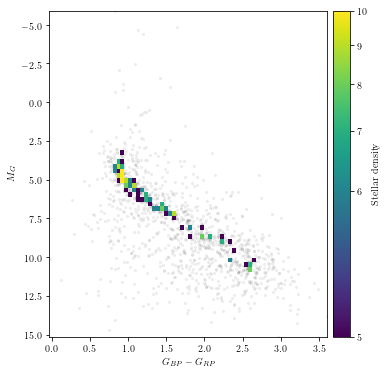

In [66]:
# plot the H-R diagram for BP - RP colour
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rc('text', usetex=True)



#select data for plotting
cstar = df['bp_rp']
mg = df['mg']

fig, ax = plt.subplots(figsize=(6, 6))
# only show 2D-histogram for bins with more than 5 stars in them
h = ax.hist2d(cstar, mg, bins=70, norm=colors.PowerNorm(0.5),cmin=5, zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(cstar, mg, alpha=0.05, s=5, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$M_G$')
cb.set_label(r"$\mathrm{Stellar~density}$")
plt.show()
# , norm=colors.PowerNorm(0.5), zorder=0.5

/Users/268964i/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1211: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0


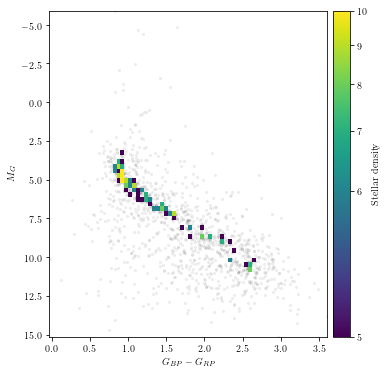

In [66]:
# plot the H-R diagram for BP - G colour
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rc('text', usetex=True)

#select data for plotting
cstar = df['bp_g']
mg = df['mg']

fig, ax = plt.subplots(figsize=(6, 6))
# only show 2D-histogram for bins with more than 5 stars in them
h = ax.hist2d(cstar, mg, bins=70, norm=colors.PowerNorm(0.5),cmin=5, zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(cstar, mg, alpha=0.05, s=5, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'$G_{BP} - G_{G}$')
ax.set_ylabel(r'$M_G$')
cb.set_label(r"$\mathrm{Stellar~density}$")
plt.show()
# , norm=colors.PowerNorm(0.5), zorder=0.5

/Users/268964i/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1211: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0


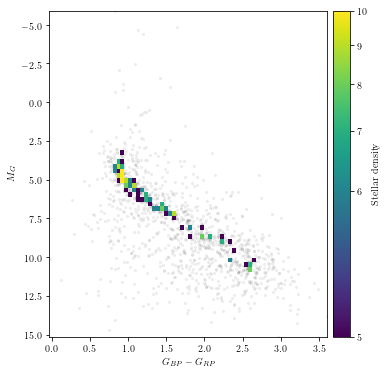

In [66]:
# plot the H-R diagram for BP - RP colour
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rc('text', usetex=True)

#select data for plotting
cstar = df['bp_rp']
mg = df['mg']

fig, ax = plt.subplots(figsize=(6, 6))
# only show 2D-histogram for bins with more than 5 stars in them
h = ax.hist2d(cstar, mg, bins=70, norm=colors.PowerNorm(0.5),cmin=5, zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(cstar, mg, alpha=0.05, s=5, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$M_G$')
cb.set_label(r"$\mathrm{Stellar~density}$")
plt.show()
# , norm=colors.PowerNorm(0.5), zorder=0.5

Within your groups work through the notebook and figure out what is being done, discuss how you would improve the code presented here.
Then work through and implement as many of the changes you thought of.
Some of the things to look out for:
- implicit vs explicit, how easy is it to follow what has been done? Are there enough comments? What about variable names, do they make sense?
- is the notebook logicaly structured?
- how much code is repeated?
- loops
- check out the information on how to query the gaia database

The catalogue we queried is here: https://gaia.aip.de/metadata/gdr2/gaia_source/
Tap examples: https://astroquery.readthedocs.io/en/latest/utils/tap.html